In [41]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [42]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [43]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [44]:
def MSE(e):
    return e.T @ e / len(e)

def MAE(e):
    return np.sum(np.abs(e)) / len(e)

def compute_loss(y, tx, w, costFunction=MSE):
    """Calculate the loss using either MSE or MAE.
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.
    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    return costFunction(y - tx @ w)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [45]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j] = compute_loss(y,tx,np.array([grid_w0[i],grid_w1[j]]).T)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.8489662935649, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.017 seconds


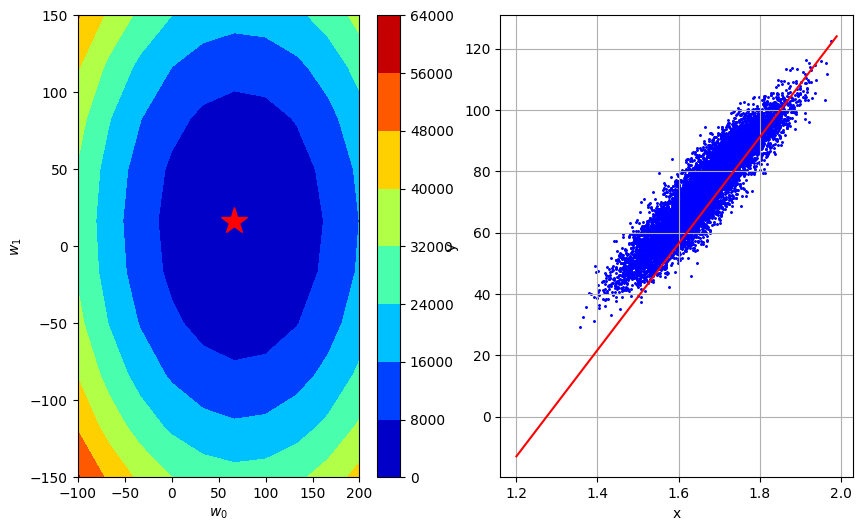

In [46]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [47]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    return - tx.T @ (y-tx @ w) / len(y)

Please fill in the functions `gradient_descent` below:

In [48]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = np.zeros((max_iters+1,len(initial_w)))
    ws[0] = initial_w
    losses = np.zeros(max_iters)

    for n in range(max_iters):
        losses[n] = compute_loss(y,tx,ws[n])
        grad_n = compute_gradient(y,tx,ws[n])
        
        ws[n+1] = ws[n] - grad_n * gamma

        # store w and loss
        print(f"GD iter. {n+1}/{max_iters}: loss={losses[n]}, w={ws[n]}")

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [49]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 1/50: loss=5584.47342551833, w=[0. 0.]
GD iter. 2/50: loss=530.6049242179332, w=[51.3057454  9.4357987]
GD iter. 3/50: loss=75.75675910088367, w=[66.69746902 12.26653832]
GD iter. 4/50: loss=34.82042424034912, w=[71.31498611 13.1157602 ]
GD iter. 5/50: loss=31.136154102900974, w=[72.70024123 13.37052676]
GD iter. 6/50: loss=30.80456979053063, w=[73.11581777 13.44695673]
GD iter. 7/50: loss=30.774727202417242, w=[73.24049073 13.46988572]
GD iter. 8/50: loss=30.772041369487102, w=[73.27789262 13.47676442]
GD iter. 9/50: loss=30.771799644523306, w=[73.28911319 13.47882803]
GD iter. 10/50: loss=30.771777889276628, w=[73.29247936 13.47944711]
GD iter. 11/50: loss=30.77177593130439, w=[73.29348921 13.47963284]
GD iter. 12/50: loss=30.771775755086896, w=[73.29379216 13.47968856]
GD iter. 13/50: loss=30.771775739227397, w=[73.29388305 13.47970527]
GD iter. 14/50: loss=30.77177573780004, w=[73.29391032 13.47971029]
GD iter. 15/50: loss=30.771775737671565, w=[73.2939185  13.47971179]
GD

In [50]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [101]:
from random import randrange

def compute_stoch_gradient(y,tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    return - tx.T @ (y - tx @ w) / len(y)

def mini_batch(y,tx,batch_size):
    shuffledIndexes = np.random.permutation(len(y))
    return y[shuffledIndexes[0:batch_size]] , tx[shuffledIndexes[0:batch_size]]


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = np.zeros((max_iters+1,len(initial_w)))
    ws[0] = initial_w
    losses = np.zeros(max_iters)

    for n in range(max_iters):
        losses[n] = compute_loss(y,tx,ws[n])

        batch_y, batch_x = mini_batch(y,tx,batch_size)
        ws[n+1] = ws[n] - gamma * compute_stoch_gradient(batch_y,batch_x,ws[n])

        print(f"SGD iter. {n+1}/{max_iters}: loss={losses[n]}, w={ws[n]}")

    return losses, ws

In [104]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 1/50: loss=5739.670229071705, w=[0. 0.]
SGD iter. 2/50: loss=5074.656381579685, w=[ 5.69802145 -5.34703121]
SGD iter. 3/50: loss=3811.9203369768243, w=[14.05310765  2.18645568]
SGD iter. 4/50: loss=2914.47493898687, w=[21.32567038 10.0964788 ]
SGD iter. 5/50: loss=2334.964374686377, w=[27.22620558 14.02945631]
SGD iter. 6/50: loss=1916.385411220256, w=[32.08967946 15.76362146]
SGD iter. 7/50: loss=1588.6972215467563, w=[36.00005467 13.80655166]
SGD iter. 8/50: loss=1263.353339789872, w=[40.72175868 15.45451218]
SGD iter. 9/50: loss=1073.383179496354, w=[43.50582899 13.77118602]
SGD iter. 10/50: loss=925.933627033059, w=[46.51055862 16.92304328]
SGD iter. 11/50: loss=808.622917483971, w=[48.94658943 17.79403258]
SGD iter. 12/50: loss=755.3204410551934, w=[50.82247964 20.15157135]
SGD iter. 13/50: loss=610.9974593294621, w=[53.20354672 17.65446358]
SGD iter. 14/50: loss=494.85293515736623, w=[55.39708972 14.82907909]
SGD iter. 15/50: loss=439.93340746038473, w=[56.85061396 14.4

In [105]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [54]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [55]:
y.shape, tx.shape

((202,), (202, 2))

In [56]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

losses, ws = gradient_descent(y,tx,w_initial,max_iters,gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 1/50: loss=5739.670229071705, w=[0. 0.]
GD iter. 2/50: loss=636.5642494031929, w=[51.8474641   7.72442641]
GD iter. 3/50: loss=177.28471123302563, w=[67.40170333 10.04175433]
GD iter. 4/50: loss=135.94955279771045, w=[72.0679751 10.7369527]
GD iter. 5/50: loss=132.22938853853208, w=[73.46785663 10.94551222]
GD iter. 6/50: loss=131.89457375520604, w=[73.88782109 11.00808007]
GD iter. 7/50: loss=131.8644404247067, w=[74.01381042 11.02685043]
GD iter. 8/50: loss=131.86172842496174, w=[74.05160723 11.03248153]
GD iter. 9/50: loss=131.8614843449847, w=[74.06294627 11.03417087]
GD iter. 10/50: loss=131.86146237778678, w=[74.06634798 11.03467767]
GD iter. 11/50: loss=131.86146040073896, w=[74.06736849 11.03482971]
GD iter. 12/50: loss=131.86146022280465, w=[74.06767465 11.03487532]
GD iter. 13/50: loss=131.86146020679058, w=[74.06776649 11.034889  ]
GD iter. 14/50: loss=131.8614602053493, w=[74.06779405 11.03489311]
GD iter. 15/50: loss=131.86146020521957, w=[74.06780231 11.03489434]

In [57]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [80]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - tx@w
    return - np.sum(np.sign(e) * tx.T,axis=1) / len(y)


In [81]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    losses = np.zeros(max_iters)
    ws = np.zeros((max_iters+1,2))
    ws[0] = initial_w

    for n in range(max_iters):
        losses[n] = compute_loss(y,tx,ws[n],MAE)
        ws[n+1] = ws[n] - gamma * compute_subgradient_mae(y,tx,ws[n])
       
        print(f"SubGD iter. {n+1}/{max_iters}: loss={losses[n]}, w={ws[n]}")

    return losses, ws

In [84]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 1/500: loss=74.06780585492638, w=[0. 0.]
SubGD iter. 2/500: loss=73.36780585492637, w=[7.00000000e-01 6.10952433e-16]
SubGD iter. 3/500: loss=72.66780585492637, w=[1.40000000e+00 1.22190487e-15]
SubGD iter. 4/500: loss=71.96780585492638, w=[2.1000000e+00 1.8328573e-15]
SubGD iter. 5/500: loss=71.26780585492638, w=[2.80000000e+00 2.44380973e-15]
SubGD iter. 6/500: loss=70.56780585492638, w=[3.50000000e+00 3.05476216e-15]
SubGD iter. 7/500: loss=69.86780585492637, w=[4.2000000e+00 3.6657146e-15]
SubGD iter. 8/500: loss=69.16780585492639, w=[4.90000000e+00 4.27666703e-15]
SubGD iter. 9/500: loss=68.46780585492637, w=[5.60000000e+00 4.88761946e-15]
SubGD iter. 10/500: loss=67.76780585492638, w=[6.30000000e+00 5.49857189e-15]
SubGD iter. 11/500: loss=67.06780585492638, w=[7.00000000e+00 6.10952433e-15]
SubGD iter. 12/500: loss=66.36780585492637, w=[7.70000000e+00 6.72047676e-15]
SubGD iter. 13/500: loss=65.66780585492639, w=[8.40000000e+00 7.33142919e-15]
SubGD iter. 14/500: los

In [79]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [106]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters+1 containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = np.zeros((max_iters+1,len(initial_w)))
    ws[0] = initial_w
    losses = np.zeros(max_iters)

    for n in range(max_iters):
        losses[n] = compute_loss(y,tx,ws[n],MAE)

        batch_y, batch_x = mini_batch(y,tx,batch_size)

        ws[n+1] = ws[n] - gamma * compute_subgradient_mae(batch_y,batch_x,ws[n])
        print(f"SubSGD iter. {n+1}/{max_iters}: loss={losses[n]}, w={ws[n]}")
    return losses, ws

In [107]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 1/500: loss=74.06780585492638, w=[0. 0.]
SubSGD iter. 2/500: loss=73.36780585492637, w=[ 0.7        -0.43968841]
SubSGD iter. 3/500: loss=72.66780585492639, w=[ 1.4       -1.0645045]
SubSGD iter. 4/500: loss=71.96780585492638, w=[2.1        0.05380572]
SubSGD iter. 5/500: loss=71.26780585492638, w=[ 2.8        -0.76485265]
SubSGD iter. 6/500: loss=70.56780585492638, w=[ 3.5       -0.8918671]
SubSGD iter. 7/500: loss=69.86780585492637, w=[4.2        0.31414919]
SubSGD iter. 8/500: loss=69.16780585492639, w=[ 4.9        -0.21280785]
SubSGD iter. 9/500: loss=68.46780585492638, w=[5.6       0.2271166]
SubSGD iter. 10/500: loss=67.76780585492638, w=[ 6.3        -0.46946815]
SubSGD iter. 11/500: loss=67.06780585492638, w=[ 7.         -0.56974525]
SubSGD iter. 12/500: loss=66.36780585492637, w=[ 7.7        -0.04168944]
SubSGD iter. 13/500: loss=65.66780585492639, w=[ 8.4        -0.72228862]
SubSGD iter. 14/500: loss=64.96780585492638, w=[ 9.1        -1.24947725]
SubSGD iter. 15/5

In [108]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>